In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
json_file_path = '/content/Historical_Quiz_Data.json'



In [55]:
with open(json_file_path, 'r') as file:
    data = json.load(file)

In [56]:
df = pd.DataFrame(data)

In [57]:
print("Data Types Before Cleaning:")
print(df.dtypes)

Data Types Before Cleaning:
id                        int64
quiz_id                   int64
user_id                  object
submitted_at             object
created_at               object
updated_at               object
score                     int64
trophy_level              int64
accuracy                 object
speed                    object
final_score              object
negative_score           object
correct_answers           int64
incorrect_answers         int64
source                   object
type                     object
started_at               object
ended_at                 object
duration                 object
better_than               int64
total_questions           int64
rank_text                object
mistakes_corrected        int64
initial_mistake_count     int64
response_map             object
quiz                     object
dtype: object


In [58]:
# Clean the data
if df['accuracy'].dtype != 'object':
    df['accuracy'] = df['accuracy'].astype(str)

In [59]:
df['accuracy'] = df['accuracy'].str.replace('%', '').astype(float) / 100

In [60]:
df['final_score'] = df['final_score'].astype(float)
df['negative_score'] = df['negative_score'].astype(float)

In [61]:
df['correct_answer_ratio'] = df['correct_answers'] / df['total_questions']
df['incorrect_answer_ratio'] = df['incorrect_answers'] / df['total_questions']
df['net_score'] = df['score'] - df['negative_score']

In [62]:
# Convert rank_text to integer
df['rank_text'] = df['rank_text'].str.replace('Topic Rank - #', '').astype(int)

In [63]:
min_marks = df['score'].min()
print("Minimum Marks:", min_marks)

Minimum Marks: 12


In [64]:
max_marks = df['score'].max()
print("Maximum Marks:", max_marks)

Maximum Marks: 116


In [65]:
std_dev = df['score'].std()
print("Standard Deviation of Scores:", std_dev)

Standard Deviation of Scores: 34.67525957182767


In [66]:
features = df[['score', 'accuracy', 'final_score', 'negative_score', 'correct_answers', 'incorrect_answers']]
target = df['rank_text']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

cv_scores = cross_val_score(model, features, target, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [-1.15259434 -0.06068058 -0.03861596 -2.4287686  -6.78127741]
Mean CV Score: -2.0923873769745347


In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)

In [71]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [72]:
print("Predicted Ranks:", y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Predicted Ranks: [-5006.19710288 -3410.86713749 -4529.75694395]
Mean Squared Error: 10477635.86276067
R^2 Score: -0.9805336063477998


In [73]:
# Visualization
sns.set(style="whitegrid")

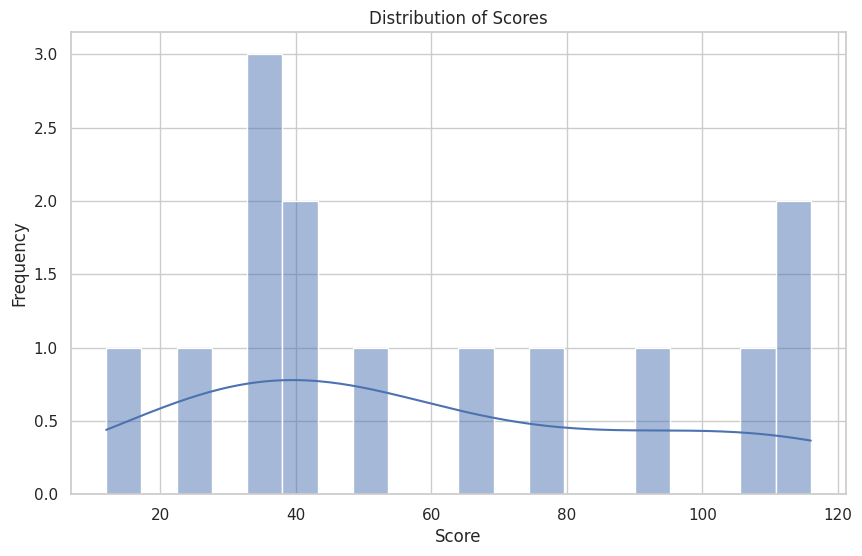

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

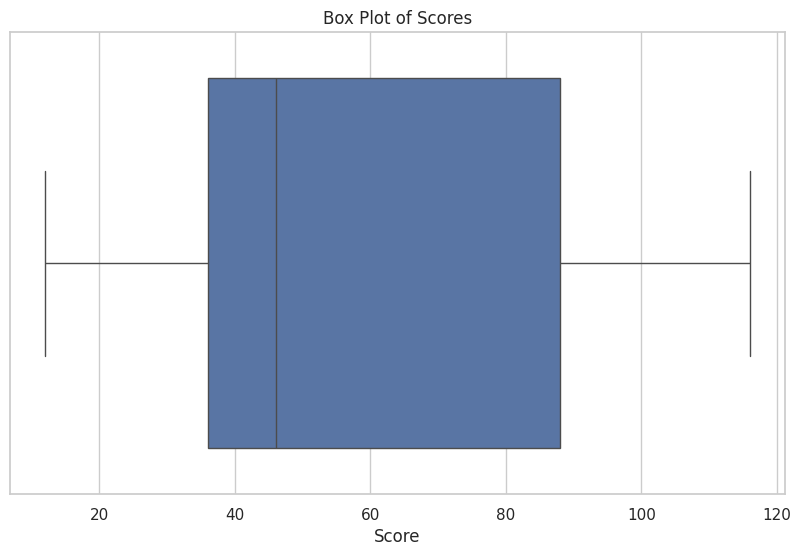

In [75]:
# Box Plot of Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['score'])
plt.title('Box Plot of Scores')
plt.xlabel('Score')
plt.show()

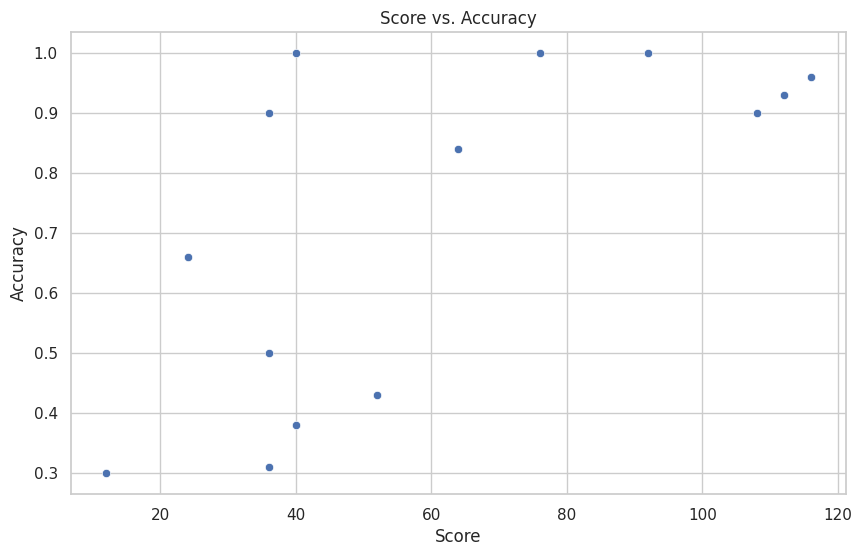

In [76]:
# Scatter Plot of Score vs. Accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='accuracy', data=df)
plt.title('Score vs. Accuracy')
plt.xlabel('Score')
plt.ylabel('Accuracy')
plt.show()

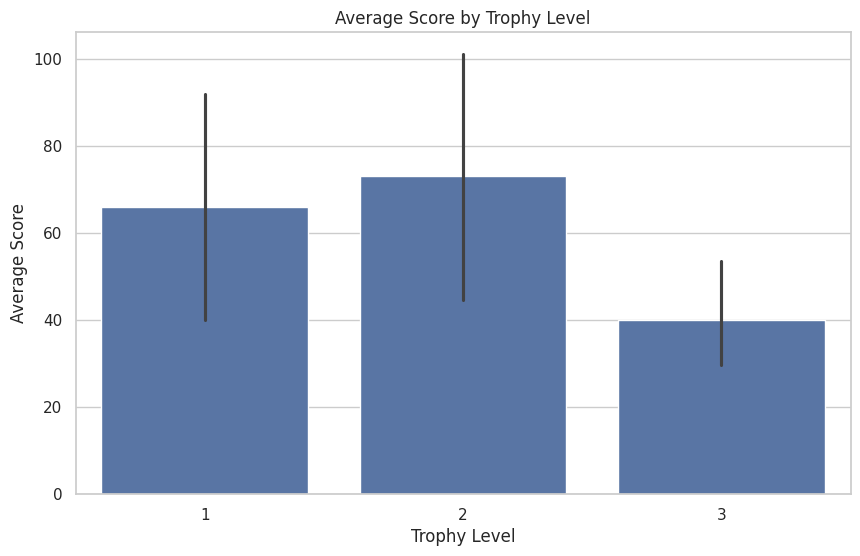

In [77]:
# Bar Plot of Average Scores by Trophy Level
plt.figure(figsize=(10, 6))
sns.barplot(x='trophy_level', y='score', data=df, estimator=np.mean)
plt.title('Average Score by Trophy Level')
plt.xlabel('Trophy Level')
plt.ylabel('Average Score')
plt.show()

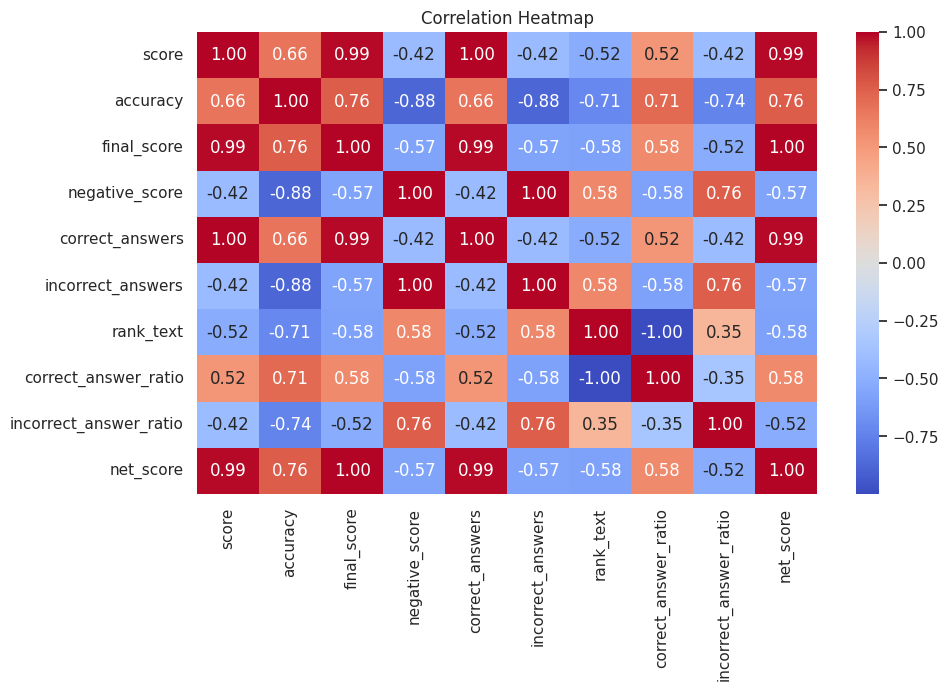

In [78]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[['score', 'accuracy', 'final_score', 'negative_score', 'correct_answers',
                          'incorrect_answers', 'rank_text', 'correct_answer_ratio',
                          'incorrect_answer_ratio', 'net_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

current quiz

In [79]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [80]:
# Define the path to the JSON file
json_file_path = '/content/current_quiz_data.json'

In [81]:
# Load the JSON data from the file
with open(json_file_path, 'r') as file:
    quiz_data = json.load(file)

In [82]:
# Extract quiz information
quiz_title = quiz_data['quiz']['title'] if quiz_data['quiz']['title'] else "No Title"
quiz_description = quiz_data['quiz']['description']
quiz_topic = quiz_data['quiz']['topic']
quiz_duration = quiz_data['quiz']['duration']
questions = quiz_data['quiz']['questions']

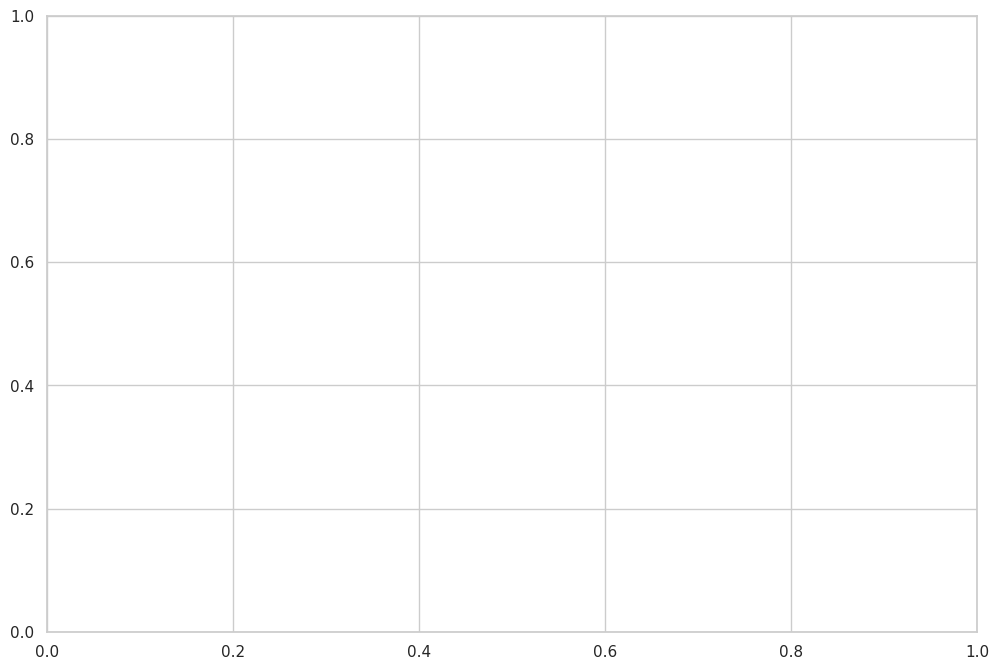

In [83]:
# Create a figure and axis for the visualization
fig, ax = plt.subplots(figsize=(12, 8))

In [84]:
# Add a title for the quiz
ax.set_title(f"Quiz: {quiz_title}", fontsize=16)

Text(0.5, 1.0, 'Quiz: Structural Organisation in Animals and Plants (7)')

In [85]:
# Draw the quiz box
quiz_box = patches.Rectangle((0.05, 0.75), 0.9, 0.2, edgecolor='black', facecolor='lightblue', lw=2)
ax.add_patch(quiz_box)
ax.text(0.5, 0.88, f"Title: {quiz_title}", fontsize=12, ha='center', va='center')
ax.text(0.5, 0.82, f"Topic: {quiz_topic}", fontsize=10, ha='center', va='center')
ax.text(0.5, 0.76, f"Duration: {quiz_duration} minutes", fontsize=10, ha='center', va='center')

Text(0.5, 0.76, 'Duration: 128 minutes')

In [86]:
# Check if there are questions
if questions:
    # Draw the question box for the first question
    question = questions[0]
    question_text = question['description']

    question_box = patches.Rectangle((0.05, 0.45), 0.9, 0.2, edgecolor='black', facecolor='lightgreen', lw=2)
    ax.add_patch(question_box)
    ax.text(0.5, 0.58, f"Question: {question_text}", fontsize=10, ha='center', va='center', wrap=True)

In [87]:
    # Draw options for the first question
    options = question['options']
    for i, option in enumerate(options):
        option_text = f"{i + 1}. {option['description']}"
        ax.text(0.5, 0.4 - i * 0.05, option_text, fontsize=10, ha='center', va='center')

In [88]:
# Draw detailed solution box
detailed_solution = question['detailed_solution']
solution_box = patches.Rectangle((0.05, 0.05), 0.9, 0.3, edgecolor='black', facecolor='lightyellow', lw=2)
ax.add_patch(solution_box)
ax.text(0.5, 0.25, "Detailed Solution:", fontsize=12, ha='center', va='center')
ax.text(0.5, 0.15, detailed_solution.replace('\n', ' '), fontsize=8, ha='center', va='center', wrap=True)

Text(0.5, 0.15, '**Explanation:**  The tissue that has a free surface is called **epithelial tissue**. This free surface may face either a body fluid (such as blood, lymph, or mucus) or the outside environment.  **Characteristics of Epithelial Tissue:**  * **Free Surface:** The cells have an exposed surface that faces either a body fluid or the external environment. * **Apical Surface:** The surface facing the external environment or body cavity. * **Basal Surface:** The surface attached to the connective tissue below. * **Closely Packed:** The cells are closely packed together with minimal intercellular space. * **Polarized Cells:** They are generally polarized, with different apical and basal surfaces and functions. * **Basement Membrane:** The basal surface is supported by a basement membrane, which separates the epithelium from the underlying connective tissue. * **Avascular:** Epithelial cells are avascular, meaning they lack blood vessels. They receive nutrients from the underlyi

In [89]:
# Set limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

(0.0, 1.0, 0.0, 1.0)

In [90]:
# Show the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

**Quiz Submission Data**

In [91]:
import json
import matplotlib.pyplot as plt

In [92]:
# Define the path to the JSON file
json_file_path = '/content/Quiz_Submission_Data.json'

In [93]:
with open(json_file_path, 'r') as file:
    submission_data = json.load(file)

In [94]:
# Extract submission information
quiz_title = submission_data['quiz'].get('title', 'No Title')
score = submission_data.get('score', 0)
accuracy = submission_data.get('accuracy', 0)
correct_answers = submission_data.get('correct_answers', 0)
incorrect_answers = submission_data.get('incorrect_answers', 0)
total_questions = submission_data.get('total_questions', correct_answers + incorrect_answers)

In [95]:
# Prepare data for the pie chart
labels = ['Correct Answers', 'Incorrect Answers']
sizes = [correct_answers, incorrect_answers]
colors = ['#4CAF50', '#F44336']  # Green for correct, red for incorrect
explode = (0.1, 0)  # Slightly explode the correct answers slice

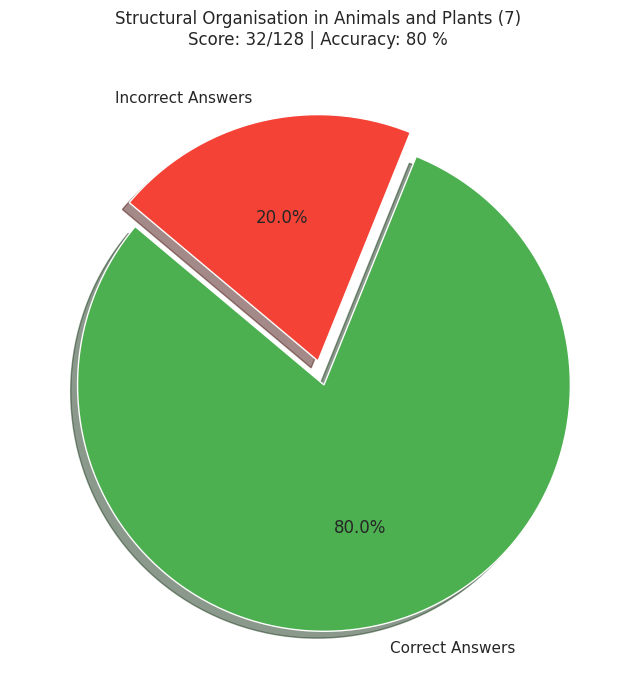

In [96]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(f'{quiz_title}\nScore: {score}/{total_questions} | Accuracy: {accuracy}')
plt.show()

In [97]:
# Prepare data for the bar chart
labels_bar = ['Final Score', 'Negative Score', 'Total Questions']
values_bar = [score, submission_data.get('negative_score', 0), total_questions]

In [98]:
labels_bar = ['Final Score', 'Negative Score', 'Total Questions']
negative_score = submission_data.get('negative_score', 0)
if isinstance(negative_score, str):
    negative_score = float(negative_score)
values_bar = [score, negative_score, total_questions]

In [99]:
future_scores = []
for i in range(1, 6):
    predicted_score = score + (correct_answers * (i * 0.1))
    future_scores.append(predicted_score)

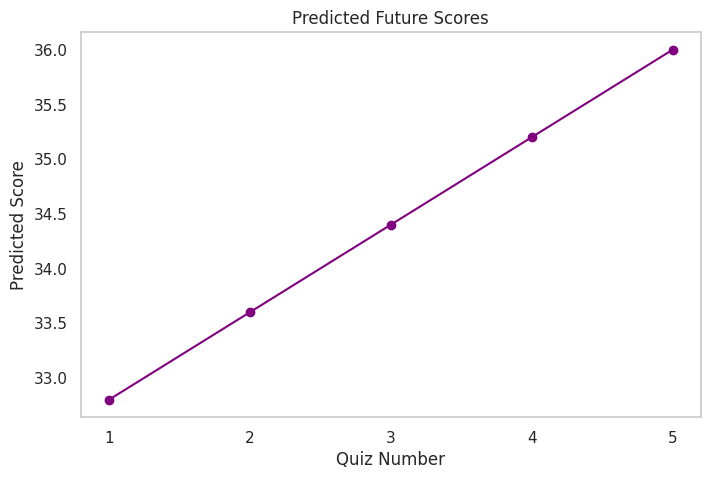

In [100]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), future_scores, marker='o', linestyle='-', color='purple')
plt.title('Predicted Future Scores')
plt.xlabel('Quiz Number')
plt.ylabel('Predicted Score')
plt.xticks(range(1, 6))
plt.grid()
plt.show()